In [32]:
import altair as alt
from vega_datasets import data

# Run this once per session, enables Altair rendering
altair.renderers.enable("notebook")

# Define dataframe as the birdstrikes dataset
df = data.birdstrikes.url

# Display sample of data format
dataset = data.birdstrikes()
dataset.head()

,Aircraft__Airline_Operator,Aircraft__Make_Model,Airport__Name,Cost__Other,Cost__Repair,Cost__Total_$,Effect__Amount_of_damage,Flight_Date,Origin_State,Speed_IAS_in_knots,When__Phase_of_flight,When__Time_of_day,Wildlife__Size,Wildlife__Species
0,MILITARY,T-38A,BARKSDALE AIR FORCE BASE ARPT,0,0,0,None,1/8/90 0:00,Louisiana,300.0,Climb,Day,Large,Turkey vulture
1,MILITARY,KC-10A,BARKSDALE AIR FORCE BASE ARPT,0,0,0,None,1/9/90 0:00,Louisiana,200.0,Approach,Night,Medium,Unknown bird or bat
2,MILITARY,B-52,BARKSDALE AIR FORCE BASE ARPT,0,0,0,None,1/11/90 0:00,Louisiana,130.0,Take-off run,Day,Medium,Unknown bird or bat
3,SOUTHWEST AIRLINES,B-737-300,NEW ORLEANS INTL,0,0,0,Substantial,1/11/90 0:00,Louisiana,140.0,Take-off run,Day,Small,Rock pigeon
4,MILITARY,KC-10A,BARKSDALE AIR FORCE BASE ARPT,0,0,0,None,1/12/90 0:00,Louisiana,160.0,Climb,Day,Medium,Unknown bird or bat


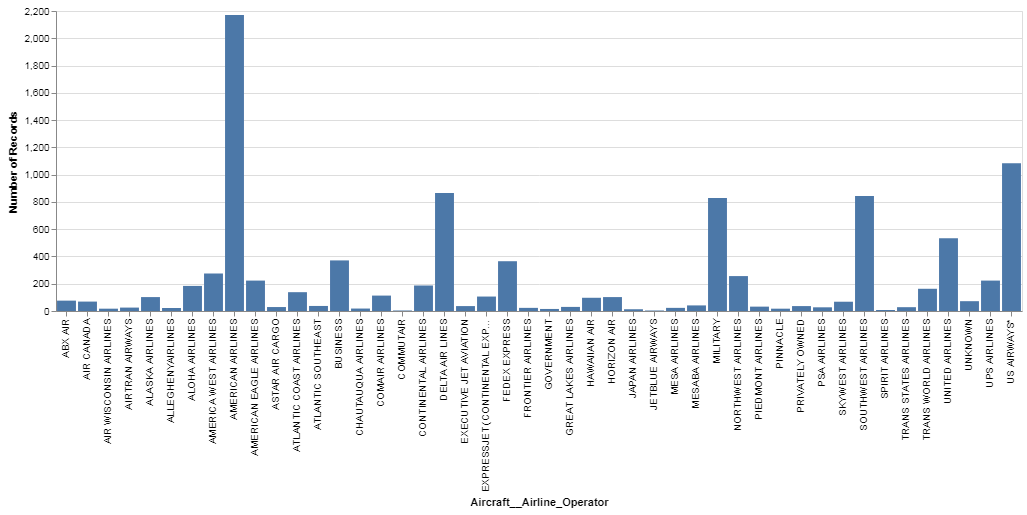

In [44]:
alt.Chart(df).mark_bar().encode(
    x = alt.X("Aircraft__Airline_Operator:N"),
    y = "count()",
)

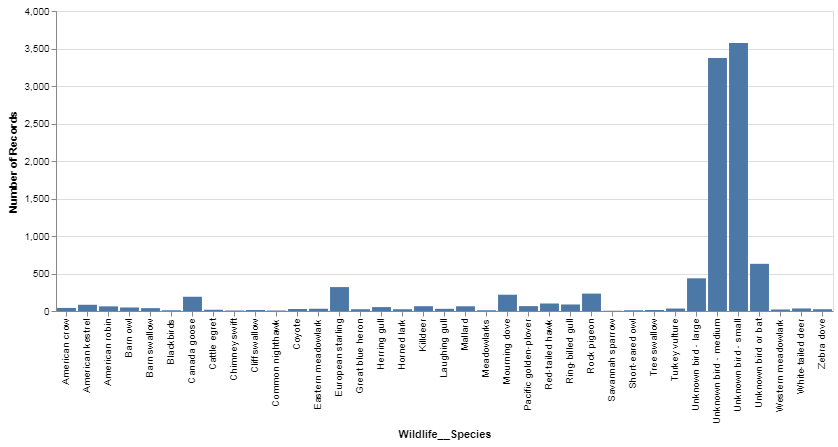

In [45]:
alt.Chart(df).mark_bar().encode(
    x = alt.X("Wildlife__Species:N"),
    y = "count()",
)

Visualizing the total cost of birdstrikes each aircraft operator has suffered

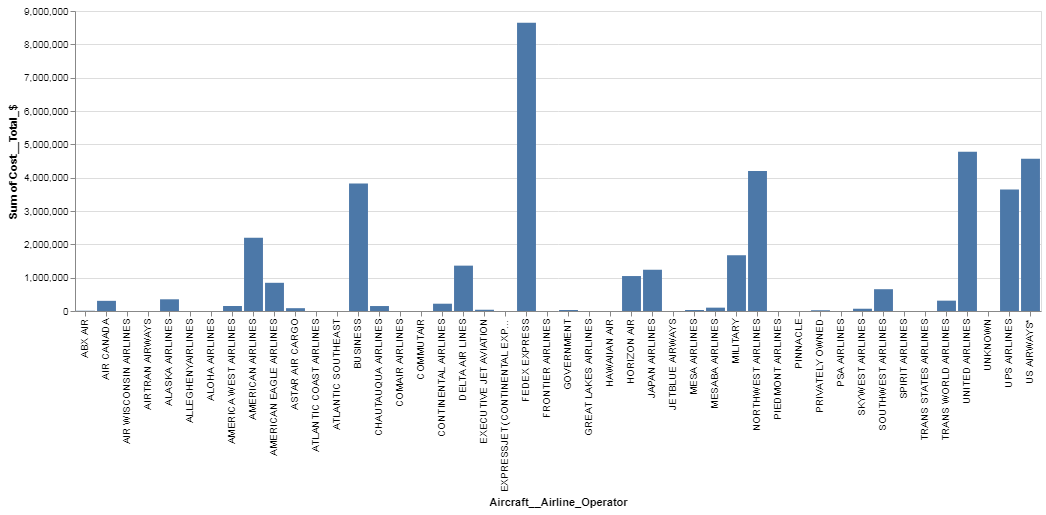

In [46]:
alt.Chart(df).mark_bar().encode(
    x = alt.X("Aircraft__Airline_Operator:N"),
    y = alt.Y("sum(Cost__Total_$):Q")
)

Visualizing the distribution of bird strikes over the time period that the data spans

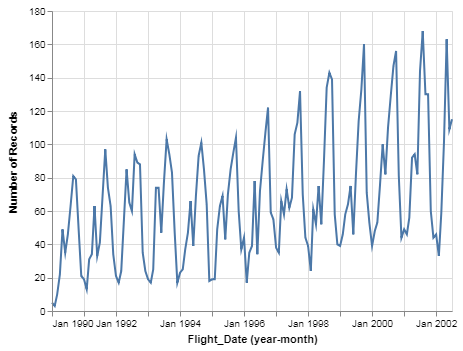

In [47]:
alt.Chart(df).mark_line().encode(
    x = alt.X("Flight_Date:T", timeUnit="yearmonth"),
    y = alt.Y("count()")
)

Visualizing the distribution of birdstrikes in each month of the year

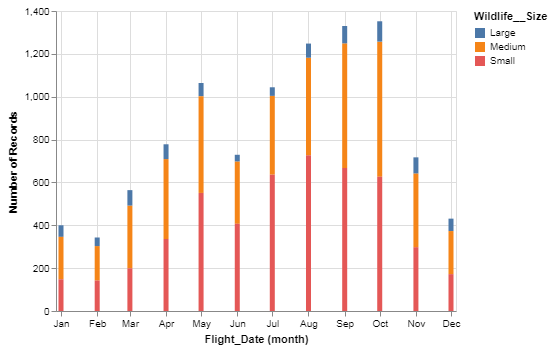

In [51]:
alt.Chart(df).mark_bar().encode(
    x = alt.X("Flight_Date:T", timeUnit="month"),
    y = alt.Y("count()"),
    color = alt.Color("Wildlife__Size:N")
)

Visualizing the size of bird struck and damage caused to airplane

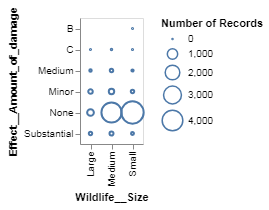

In [57]:
alt.Chart(df).mark_point().encode(
    x = alt.X("Wildlife__Size:N"),
    y = alt.Y("Effect__Amount_of_damage:N"),
    size = alt.Size("count()", scale=alt.Scale(range=[1,500]))
)

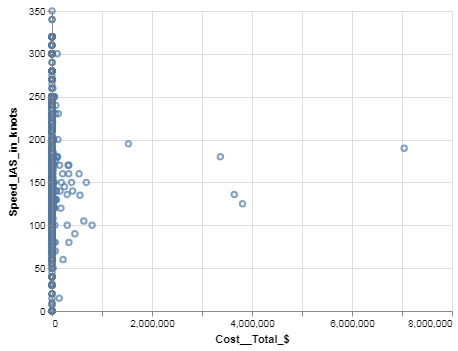

In [64]:
alt.Chart(df).mark_point().encode(
    x = alt.X("Cost__Total_$:Q"),
    y = alt.Y("Speed_IAS_in_knots:Q"),
)